In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('fivethirtyeight')

In [2]:
state_covid_df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
pd.set_option('display.max_rows', 1000)

In [3]:
state_covid_df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
16166,2021-06-04,Tripura,53219,46170,531,23,990028.0
16167,2021-06-04,India,28581232,26589759,340770,11405,357433846.0
16168,2021-06-04,Uttar Pradesh,1695212,1648771,20895,0,50405118.0
16169,2021-06-04,Uttarakhand,332067,297122,6573,5842,4886352.0


In [4]:
state_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16171 entries, 0 to 16170
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16171 non-null  object 
 1   State      16171 non-null  object 
 2   Confirmed  16171 non-null  int64  
 3   Recovered  16171 non-null  int64  
 4   Deceased   16171 non-null  int64  
 5   Other      16171 non-null  int64  
 6   Tested     15408 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 884.5+ KB


In [5]:
state_covid_df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [6]:
state_covid_df['Date'] = pd.to_datetime(state_covid_df['Date'])

In [7]:
state_covid_df.sort_values(by=['State','Date'], inplace=True)

In [8]:
filt = state_covid_df.State=='Maharashtra'
state_covid_df.loc[filt].tail(200)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
8849,2020-11-17,Maharashtra,1752509,1623503,46102,979,9847478.0
8885,2020-11-18,Maharashtra,1757520,1630111,46202,986,9900878.0
8921,2020-11-19,Maharashtra,1763055,1635971,46356,990,9965119.0
8957,2020-11-20,Maharashtra,1768695,1642916,46511,996,10035665.0
8993,2020-11-21,Maharashtra,1774455,1647004,46573,1005,10120470.0
9029,2020-11-22,Maharashtra,1780208,1651064,46623,1009,10213026.0
9065,2020-11-23,Maharashtra,1784361,1654793,46653,1013,10281543.0
9101,2020-11-24,Maharashtra,1789800,1658879,46683,1017,10366579.0
9137,2020-11-25,Maharashtra,1795959,1663723,46748,1024,10456962.0
9173,2020-11-26,Maharashtra,1802365,1668538,46813,1051,10547333.0


In [9]:
state_grp = state_covid_df.groupby('State')

In [10]:
state_wise = state_grp.agg({'Confirmed':'max', 'Recovered':'max','Deceased':'max','Tested':'max'}).sort_values(by='Confirmed',ascending=False)

In [11]:
state_wise

,Confirmed,Recovered,Deceased,Tested
State,,,,
India,28581232,26589759,340770,357433846.0
Maharashtra,5791413,5486206,97394,35774626.0
Karnataka,2653446,2336096,30531,30149275.0
Kerala,2584854,2390437,9376,20178932.0
Tamil Nadu,2172751,1866660,25665,28196279.0
Andhra Pradesh,1728577,1578452,11213,19534279.0
Uttar Pradesh,1695212,1648771,20895,50405118.0
Delhi,1427926,1394731,24447,19526590.0
West Bengal,1403535,1325834,15921,12645747.0


In [12]:
state_wise.drop('State Unassigned', inplace=True)

In [13]:
fatality_ratio = (state_wise['Deceased']/state_wise['Confirmed'])*100

In [14]:
state_wise['Fatality_ratio'] = fatality_ratio

In [15]:
state_wise

,Confirmed,Recovered,Deceased,Tested,Fatality_ratio
State,,,,,
India,28581232,26589759,340770,357433846.0,1.192286
Maharashtra,5791413,5486206,97394,35774626.0,1.681697
Karnataka,2653446,2336096,30531,30149275.0,1.150617
Kerala,2584854,2390437,9376,20178932.0,0.362728
Tamil Nadu,2172751,1866660,25665,28196279.0,1.181221
Andhra Pradesh,1728577,1578452,11213,19534279.0,0.648684
Uttar Pradesh,1695212,1648771,20895,50405118.0,1.232589
Delhi,1427926,1394731,24447,19526590.0,1.712064
West Bengal,1403535,1325834,15921,12645747.0,1.134350


## Death to case ratio

In [16]:
only_state_wise_df = state_wise.drop('India')

Text(0.5, 0.98, 'Top 20 States with highest fatality Ratio')

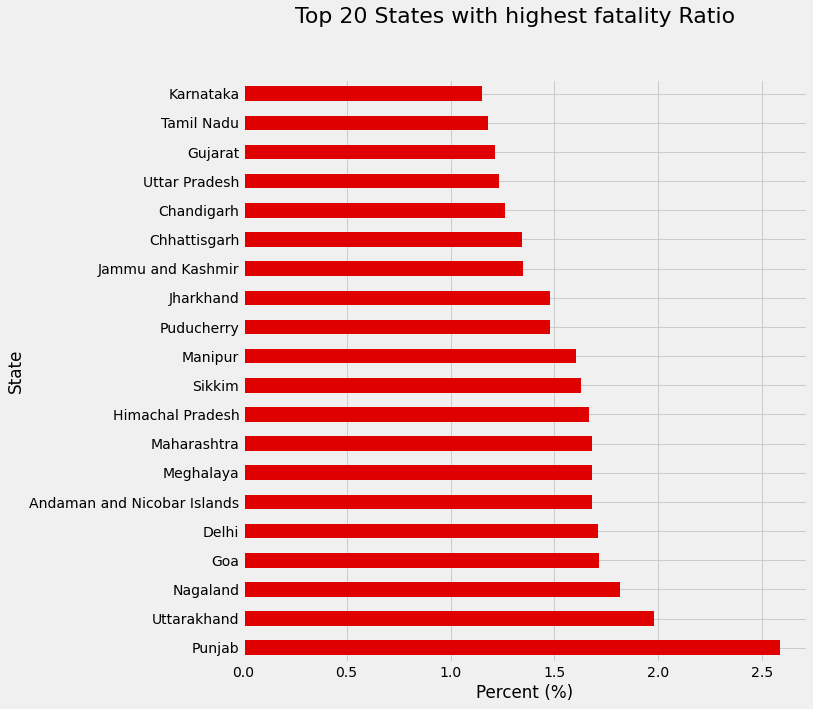

In [17]:
only_state_wise_df.sort_values('Fatality_ratio',
                                     ascending=False)['Fatality_ratio'].head(20).plot.barh(figsize=(9,10), color='#df0000')
plt.xlabel('Percent (%)')
plt.suptitle('Top 20 States with highest fatality Ratio',fontsize=22)
# plt.suptitle('df')

`Percentage of Deceased people is highest in Punjab followed by Sikkim, West Bengal and Maharashtra`

## Recovery rate

In [18]:
states_recovery_per = (only_state_wise_df['Recovered']/only_state_wise_df['Confirmed'])*100

In [19]:
states_recovery_per.sort_values(ascending=False)

State
Delhi                                       97.675300
Bihar                                       97.644745
Dadra and Nagar Haveli and Daman and Diu    97.421535
Uttar Pradesh                               97.260461
Haryana                                     97.207965
Madhya Pradesh                              97.139901
Chandigarh                                  96.859220
Andaman and Nicobar Islands                 96.463932
Jharkhand                                   96.305710
Rajasthan                                   96.187893
Gujarat                                     95.783196
Chhattisgarh                                95.647140
Maharashtra                                 94.730008
West Bengal                                 94.463907
Telangana                                   93.866665
Himachal Pradesh                            92.597483
Kerala                                      92.478608
Punjab                                      92.420843
Goa                   

Text(0.5, 1.0, 'Recovery rate of Each State')

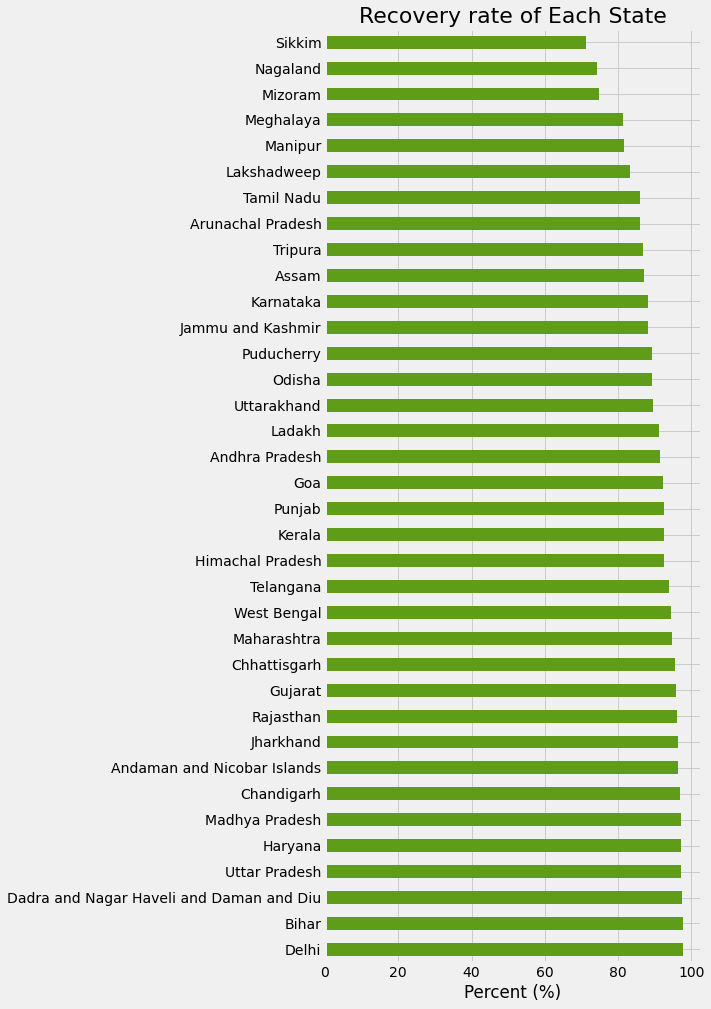

In [20]:
states_recovery_per.sort_values(ascending=False).plot.barh(figsize=(6,16), color='#5f9c17')
plt.xlabel('Percent (%)')
plt.ylabel('')
plt.title('Recovery rate of Each State', fontsize=22)

## Percentage chances of getting COVID

In [21]:
per_chan = (only_state_wise_df['Confirmed']/only_state_wise_df['Tested'])*100

Text(0.5, 0.98, 'Confirmed to Tested Ratio')

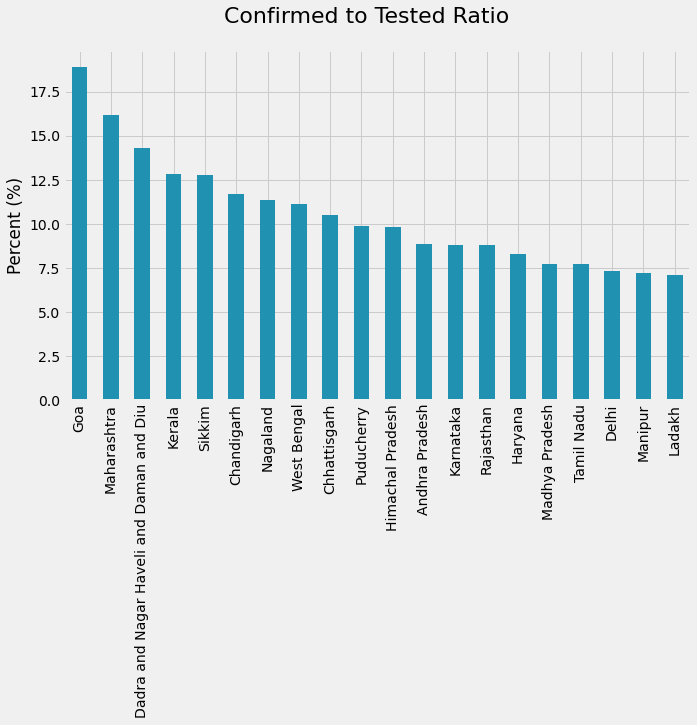

In [22]:
per_chan.sort_values(ascending=False).head(20).plot.bar(figsize=(10,6), color='#2091b0')
plt.ylabel('Percent (%)')
plt.xlabel('')
plt.suptitle('Confirmed to Tested Ratio', fontsize=22)

In [23]:
state_wise.drop('India', inplace=True)

In [24]:
others_ser = state_wise.loc['Uttarakhand':].agg('sum')

In [25]:
state_wise.index

Index(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh',
       'Uttar Pradesh', 'Delhi', 'West Bengal', 'Chhattisgarh', 'Rajasthan',
       'Gujarat', 'Odisha', 'Madhya Pradesh', 'Haryana', 'Bihar', 'Telangana',
       'Punjab', 'Assam', 'Jharkhand', 'Uttarakhand', 'Jammu and Kashmir',
       'Himachal Pradesh', 'Goa', 'Puducherry', 'Chandigarh', 'Tripura',
       'Manipur', 'Meghalaya', 'Arunachal Pradesh', 'Nagaland', 'Ladakh',
       'Sikkim', 'Mizoram', 'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep', 'Andaman and Nicobar Islands'],
      dtype='object', name='State')

In [26]:
state_wise.drop(index=['Uttarakhand', 'Goa', 'Himachal Pradesh', 'Puducherry', 'Tripura',
       'Manipur', 'Chandigarh', 'Arunachal Pradesh', 'Meghalaya', 'Nagaland',
       'Ladakh', 'Sikkim', 'Andaman and Nicobar Islands', 'Mizoram',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep'], inplace=True)

In [27]:
state_wise.loc['Others'] = others_ser

In [28]:
state_wise

,Confirmed,Recovered,Deceased,Tested,Fatality_ratio
State,,,,,
Maharashtra,5791413.0,5486206.0,97394.0,35774626.0,1.681697
Karnataka,2653446.0,2336096.0,30531.0,30149275.0,1.150617
Kerala,2584854.0,2390437.0,9376.0,20178932.0,0.362728
Tamil Nadu,2172751.0,1866660.0,25665.0,28196279.0,1.181221
Andhra Pradesh,1728577.0,1578452.0,11213.0,19534279.0,0.648684
Uttar Pradesh,1695212.0,1648771.0,20895.0,50405118.0,1.232589
Delhi,1427926.0,1394731.0,24447.0,19526590.0,1.712064
West Bengal,1403535.0,1325834.0,15921.0,12645747.0,1.134350
Chhattisgarh,976760.0,934243.0,13139.0,9294551.0,1.345162


In [29]:
state_wise_cases = state_wise['Confirmed']
state_wise_rec = state_wise['Recovered']
state_wise_deaths = state_wise['Deceased']

Text(0.5, 1.0, 'Percent share of Confirmed Cases by State')

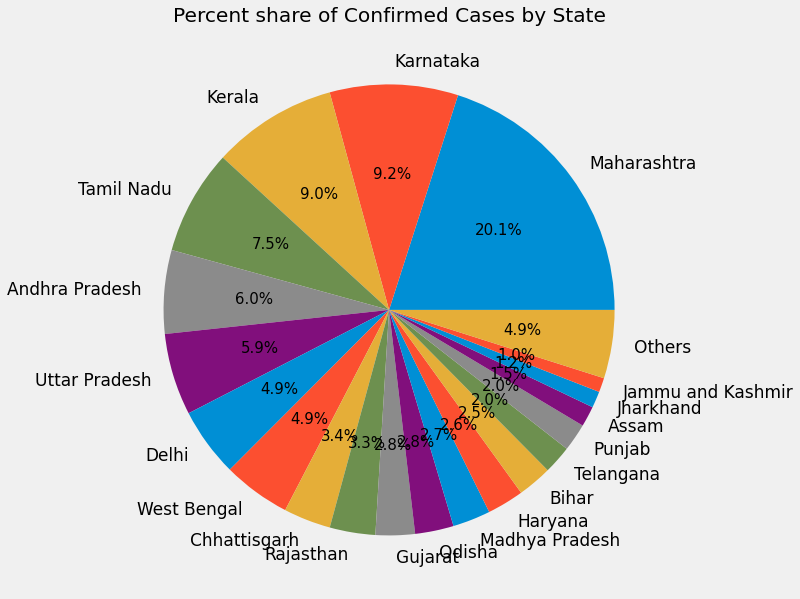

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(27)
fig.set_figwidth(9)
patches, texts, autotexts = ax.pie(state_wise_cases.values, labels=state_wise_cases.index, autopct='%1.1f%%')

for i in range(len(texts)):
    texts[i].set_fontsize(17)
    autotexts[i].set_fontsize(15)

plt.title('Percent share of Confirmed Cases by State')

`Above graph shows what percentage of Confirmed COVID cases are comming from each State out of the total cases in India`

In [31]:
maharashtra = state_grp.get_group('Maharashtra')[['Date','Confirmed','Recovered','Deceased']]
karnataka = state_grp.get_group('Karnataka')[['Date','Confirmed','Recovered','Deceased']]
andhra = state_grp.get_group('Andhra Pradesh')[['Date','Confirmed','Recovered','Deceased']]
tamil_nadu = state_grp.get_group('Tamil Nadu')[['Date','Confirmed','Recovered','Deceased']]
kerala = state_grp.get_group('Kerala')[['Date','Confirmed','Recovered','Deceased']]
delhi = state_grp.get_group('Delhi')[['Date','Confirmed','Recovered','Deceased']]
up = state_grp.get_group('Uttar Pradesh')[['Date','Confirmed','Recovered','Deceased']]
west_ben = state_grp.get_group('West Bengal')[['Date','Confirmed','Recovered','Deceased']]

In [32]:
maharashtra

,Date,Confirmed,Recovered,Deceased
62,2020-03-09,2,0,0
75,2020-03-10,5,0,0
88,2020-03-11,11,0,0
102,2020-03-12,14,0,0
116,2020-03-13,17,0,0
131,2020-03-14,26,0,0
146,2020-03-15,32,0,0
162,2020-03-16,39,0,0
179,2020-03-17,41,0,0
198,2020-03-18,45,0,0


Text(0.5, 0.98, 'Top 8 States with Higest cases over Time')

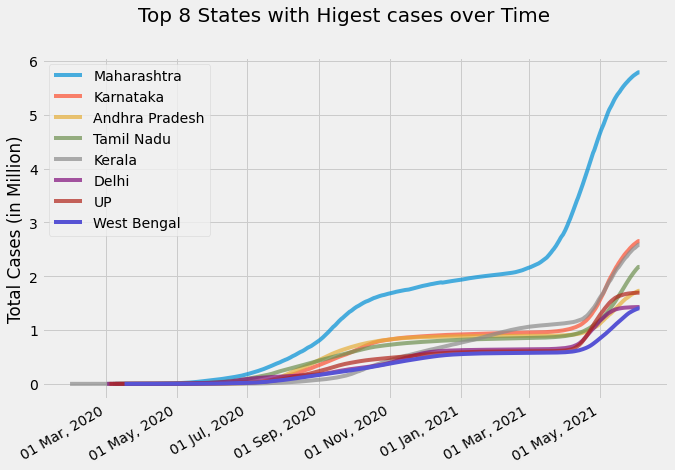

In [33]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Confirmed']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Confirmed']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Confirmed']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Confirmed']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Confirmed']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Confirmed']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Confirmed']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Confirmed']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Top 8 States with Higest cases over Time', fontsize=20)

Text(0.5, 0.98, 'Top 8 States Recovery over Time')

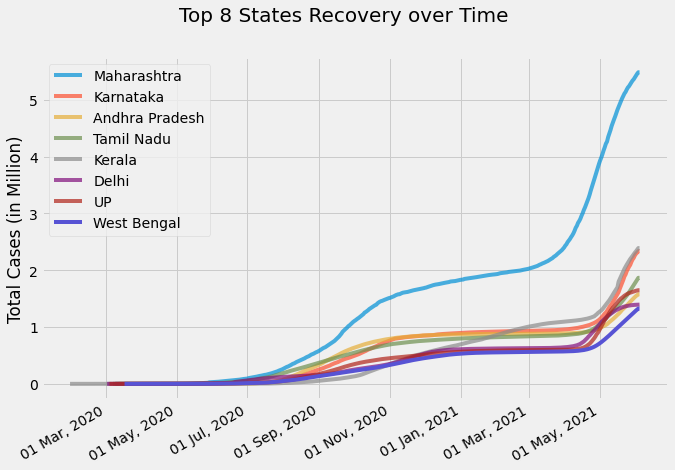

In [34]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Recovered']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Recovered']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Recovered']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Recovered']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Recovered']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Recovered']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Recovered']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Recovered']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Top 8 States Recovery over Time', fontsize=20)

Text(0.5, 0.98, 'Total Deaths in Top 8 States over Time')

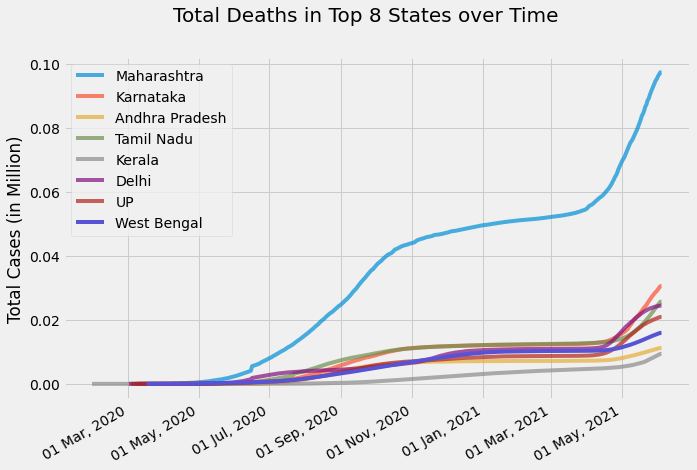

In [35]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Deceased']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Deceased']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Deceased']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Deceased']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Deceased']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Deceased']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Deceased']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Deceased']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Total Deaths in Top 8 States over Time', fontsize=20)

Text(0.5, 0, 'Count (in Million)')

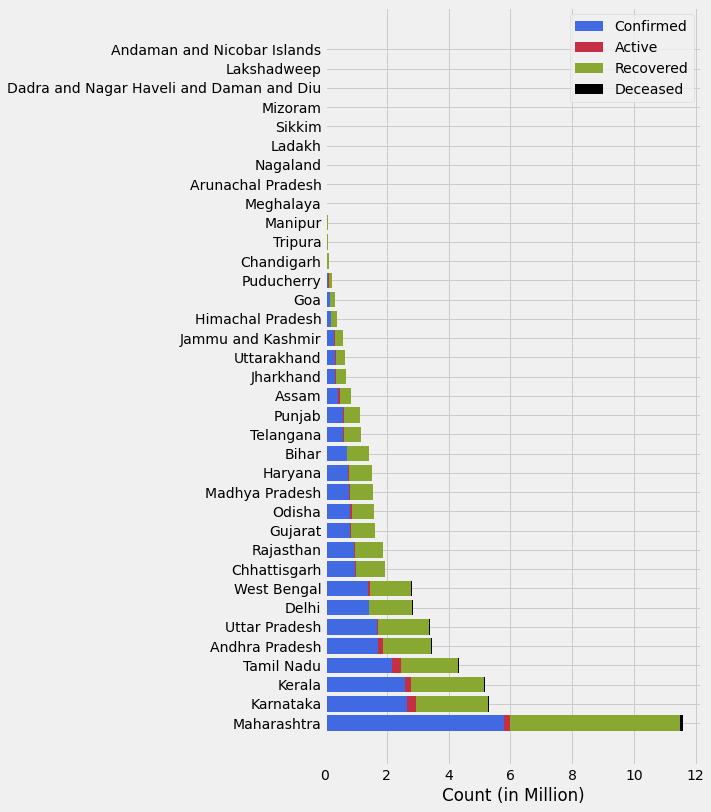

In [36]:
death = only_state_wise_df.Deceased
recov = only_state_wise_df.Recovered
conf = only_state_wise_df.Confirmed
active = conf - death - recov

plt.figure(figsize=(6,13))

data_lst = [conf/10**6, active/10**6, recov/10**6, death/10**6]
label_lst = ['Confirmed','Active','Recovered','Deceased']
color_lst = ['royalblue','#c42f43','#89a832','black']
left=0

for data, color, label in zip(data_lst, color_lst, label_lst):
    plt.barh(data.index, data, color=color, left=left, label=label)
    left+=data

plt.legend()
plt.xlabel('Count (in Million)')

## Confirmed = Active + Recovered + Deceased

In [37]:
state_daily_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

In [38]:
state_daily_df.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [39]:
state_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1341 non-null   object
 1   Date_YMD  1341 non-null   object
 2   Status    1341 non-null   object
 3   TT        1341 non-null   int64 
 4   AN        1341 non-null   int64 
 5   AP        1341 non-null   int64 
 6   AR        1341 non-null   int64 
 7   AS        1341 non-null   int64 
 8   BR        1341 non-null   int64 
 9   CH        1341 non-null   int64 
 10  CT        1341 non-null   int64 
 11  DN        1341 non-null   int64 
 12  DD        1341 non-null   int64 
 13  DL        1341 non-null   int64 
 14  GA        1341 non-null   int64 
 15  GJ        1341 non-null   int64 
 16  HR        1341 non-null   int64 
 17  HP        1341 non-null   int64 
 18  JK        1341 non-null   int64 
 19  JH        1341 non-null   int64 
 20  KA        1341 non-null   int64 
 21  KL        1341

In [40]:
state_daily_df['Date_YMD'] = pd.to_datetime(state_daily_df['Date_YMD'], format='%Y-%m-%d')

In [41]:
state_daily_df.sort_values(by=['Status','Date_YMD'], inplace=True)

In [42]:
state_daily_df

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,30-May-21,2021-05-30,Recovered,237664,23,21133,306,5690,4130,509,...,5371,9636,130,32982,3660,722,6713,1927,18642,0
1330,31-May-21,2021-05-31,Recovered,255125,36,19845,350,5037,3196,483,...,4904,8000,83,31223,3464,873,5491,3039,17856,0
1333,01-Jun-21,2021-06-01,Recovered,231397,26,18257,352,4992,3100,389,...,5039,6114,334,31673,3308,845,5625,2062,17722,0
1336,02-Jun-21,2021-06-02,Recovered,211890,36,15612,329,4389,2772,361,...,4426,6038,136,32263,2242,864,4939,2778,17386,0


In [43]:
state_daily_df.set_index('Date_YMD', inplace=True)

In [44]:
filt = state_daily_df.Status=='Confirmed'
maha_daily_conf = state_daily_df.loc[filt, 'MH']
filt = state_daily_df.Status=='Recovered'
maha_daily_rec = state_daily_df.loc[filt, 'MH']
filt = state_daily_df.Status=='Deceased'
maha_daily_death = state_daily_df.loc[filt, 'MH']

In [45]:
curr_date = state_daily_df.index.max()

todays_cases = maha_daily_conf.get(curr_date)
todays_rec = maha_daily_rec.get(curr_date)
todays_death = maha_daily_death.get(curr_date)

Text(-35, 10, '643')

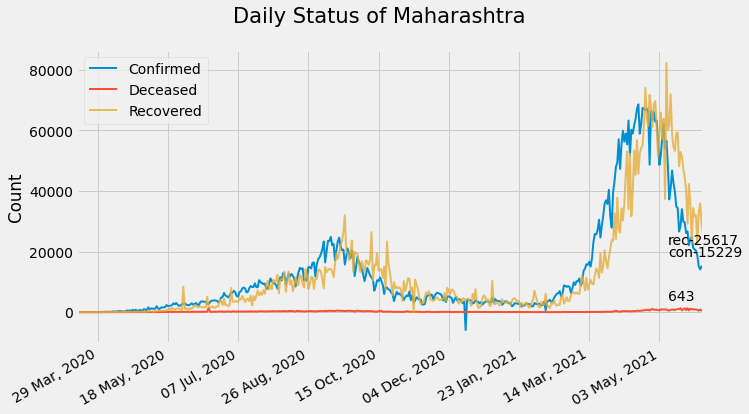

In [46]:
plt.figure(figsize=(10,6))

maha_daily_conf.plot(linewidth=2, label='Confirmed')
maha_daily_death.plot(linewidth=2, label='Deceased')
maha_daily_rec.plot(linewidth=2, label='Recovered', alpha=.8)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))


plt.ylabel('Count')
plt.xlabel('')
plt.suptitle('Daily Status of Maharashtra', fontsize=21)
plt.legend()

plt.annotate(text='con-'+str(todays_cases), xy=(curr_date, todays_cases),
             xycoords='data', xytext=(-35,10), textcoords='offset points', fontsize=14)
plt.annotate(text='rec-'+str(todays_rec), xy=(curr_date, todays_rec),
             xycoords='data', xytext=(-35,-10), textcoords='offset points', fontsize=14)
plt.annotate(text=str(todays_death), xy=(curr_date, todays_death),
             xycoords='data', xytext=(-35,10), textcoords='offset points', fontsize=14)

# Vaccination

In [47]:
vac_df = pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')
pd.set_option('display.max_rows', 1000)

In [48]:
vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,30/05/2021,West Bengal,10547015.0,381157.0,1170.0,10547015.0,3865954.0,5871662.0,4674095.0,1258.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5140,31/05/2021,West Bengal,10838457.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5141,01/06/2021,West Bengal,11075394.0,781523.0,2249.0,11075394.0,3893763.0,6194489.0,4879421.0,1484.0,1677903.0,13291254.0,0.0,1148.0,2552320.0,4530593.0,3990153.0,14969157.0
5142,02/06/2021,West Bengal,11283299.0,790334.0,1988.0,11283299.0,3903113.0,6317601.0,4964153.0,1545.0,1693274.0,13493138.0,0.0,1184.0,2659657.0,4602658.0,4018278.0,15186412.0


In [49]:
filt = vac_df.State=='India'
index_names = vac_df.loc[filt].index
state_vac_df = vac_df.drop(index_names).copy()

In [50]:
state_vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
139,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
140,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
141,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
142,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
143,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,30/05/2021,West Bengal,10547015.0,381157.0,1170.0,10547015.0,3865954.0,5871662.0,4674095.0,1258.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5140,31/05/2021,West Bengal,10838457.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5141,01/06/2021,West Bengal,11075394.0,781523.0,2249.0,11075394.0,3893763.0,6194489.0,4879421.0,1484.0,1677903.0,13291254.0,0.0,1148.0,2552320.0,4530593.0,3990153.0,14969157.0
5142,02/06/2021,West Bengal,11283299.0,790334.0,1988.0,11283299.0,3903113.0,6317601.0,4964153.0,1545.0,1693274.0,13493138.0,0.0,1184.0,2659657.0,4602658.0,4018278.0,15186412.0


In [51]:
state_vac_df.drop(['Total Sessions Conducted','Total Sites ','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)'], axis=1, inplace=True)

In [52]:
state_vac_df.head(200)

,Updated On,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
139,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
140,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
141,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
142,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
143,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
144,21/01/2021,Andaman and Nicobar Islands,239.0,239.0,0.0,0.0,239.0,NaN,NaN,NaN,NaN,NaN,239.0
145,22/01/2021,Andaman and Nicobar Islands,552.0,552.0,0.0,0.0,552.0,NaN,NaN,NaN,NaN,NaN,552.0
146,23/01/2021,Andaman and Nicobar Islands,920.0,920.0,0.0,0.0,920.0,NaN,NaN,NaN,NaN,NaN,920.0
147,24/01/2021,Andaman and Nicobar Islands,966.0,966.0,0.0,0.0,966.0,NaN,NaN,NaN,NaN,NaN,966.0
148,25/01/2021,Andaman and Nicobar Islands,1519.0,1519.0,0.0,0.0,1519.0,NaN,NaN,NaN,NaN,NaN,1519.0


In [53]:
state_vac_df.rename(columns={'Updated On':'Date'}, inplace=True)

In [54]:
state_vac_df['Date'] = pd.to_datetime(state_vac_df['Date'], format='%d/%m/%Y')
state_vac_df.sort_values(by=['State', 'Date'])

,Date,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
139,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
140,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
141,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
142,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
143,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,2021-05-30,West Bengal,10547015.0,10547015.0,3865954.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5140,2021-05-31,West Bengal,10838457.0,10838457.0,3879678.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5141,2021-06-01,West Bengal,11075394.0,11075394.0,3893763.0,1677903.0,13291254.0,0.0,1148.0,2552320.0,4530593.0,3990153.0,14969157.0
5142,2021-06-02,West Bengal,11283299.0,11283299.0,3903113.0,1693274.0,13493138.0,0.0,1184.0,2659657.0,4602658.0,4018278.0,15186412.0


In [55]:
state_vac_grp = state_vac_df.groupby('State')

In [56]:
state_wise_vac = state_vac_grp.agg({'First Dose Administered':'max', 'Second Dose Administered':'max',
                  'Second Dose Administered':'max', 'Total Covaxin Administered':'max',
                  'Total CoviShield Administered':'max','Total Individuals Vaccinated':'max',
                  'Total Doses Administered':'max'})

In [57]:
states = (state_wise_vac['Total Individuals Vaccinated']/10**6).sort_values(ascending=False)

Text(0.5, 1.0, 'Vaccination of all States')

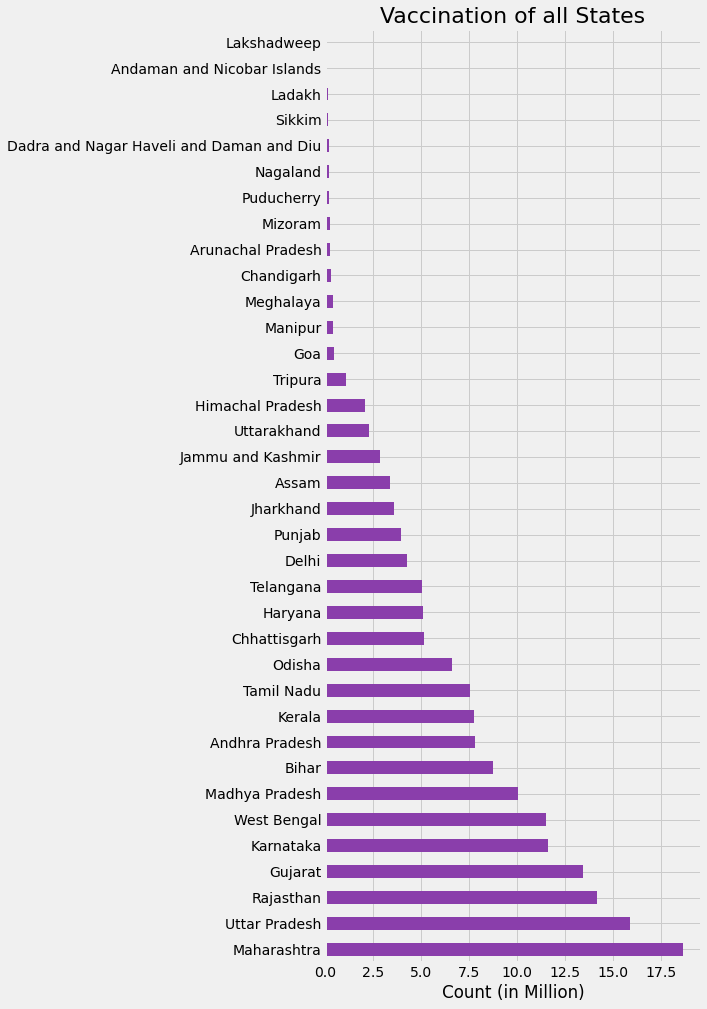

In [58]:
plt.figure(figsize=(6,16))
states.plot.barh(color='#8a3eab')
plt.xlabel('Count (in Million)')
plt.ylabel('')
plt.title('Vaccination of all States', fontsize=22)

In [59]:
state_vac_df.head(300)

,Date,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
139,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
140,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
141,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
142,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
143,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
144,2021-01-21,Andaman and Nicobar Islands,239.0,239.0,0.0,0.0,239.0,NaN,NaN,NaN,NaN,NaN,239.0
145,2021-01-22,Andaman and Nicobar Islands,552.0,552.0,0.0,0.0,552.0,NaN,NaN,NaN,NaN,NaN,552.0
146,2021-01-23,Andaman and Nicobar Islands,920.0,920.0,0.0,0.0,920.0,NaN,NaN,NaN,NaN,NaN,920.0
147,2021-01-24,Andaman and Nicobar Islands,966.0,966.0,0.0,0.0,966.0,NaN,NaN,NaN,NaN,NaN,966.0
148,2021-01-25,Andaman and Nicobar Islands,1519.0,1519.0,0.0,0.0,1519.0,NaN,NaN,NaN,NaN,NaN,1519.0


In [60]:
state_vac_df.dropna(thresh=5, inplace=True)

In [61]:
state_vac_df.set_index(['State', 'Date'], inplace=True)

In [62]:
mah_total_vac = state_vac_df.loc['Maharashtra']['Total Individuals Vaccinated']
up_total_vac = state_vac_df.loc['Uttar Pradesh']['Total Individuals Vaccinated']
guj_total_vac = state_vac_df.loc['Gujarat']['Total Individuals Vaccinated']
raj_total_vac = state_vac_df.loc['Rajasthan']['Total Individuals Vaccinated']
wb_total_vac = state_vac_df.loc['West Bengal']['Total Individuals Vaccinated']
kar_total_vac = state_vac_df.loc['Karnataka']['Total Individuals Vaccinated']


Text(0.5, 0.98, 'Total Individuals Vaccinated Over Time')

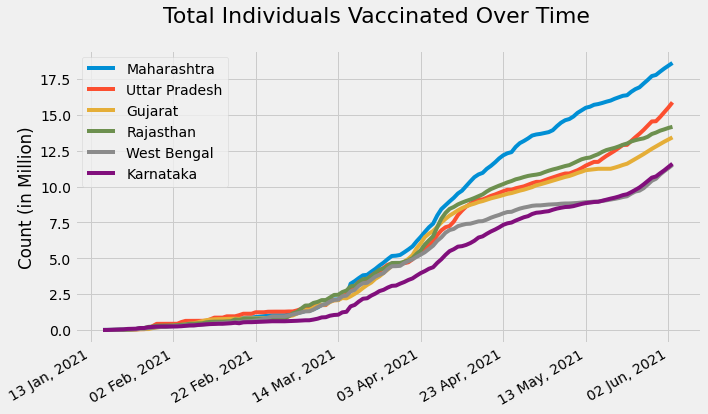

In [63]:
plt.figure(figsize=(10,6))
plt.plot(mah_total_vac/10**6, label='Maharashtra')
plt.plot(up_total_vac/10**6, label='Uttar Pradesh')
plt.plot(guj_total_vac/10**6, label='Gujarat')
plt.plot(raj_total_vac/10**6, label='Rajasthan')
plt.plot(wb_total_vac/10**6, label='West Bengal')
plt.plot(kar_total_vac/10**6, label='Karnataka')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.xlabel('')
plt.ylabel('Count (in Million)')
plt.suptitle('Total Individuals Vaccinated Over Time', fontsize=22)

## How many Individuals are immunized daily?

In [64]:
state_vac_df

Total Individuals Vaccinated  \
State                       Date                                       
Andaman and Nicobar Islands 2021-01-16                          23.0   
                            2021-01-17                          23.0   
                            2021-01-18                          42.0   
                            2021-01-19                          89.0   
                            2021-01-20                         124.0   
...                                                              ...   
West Bengal                 2021-05-30                    10547015.0   
                            2021-05-31                    10838457.0   
                            2021-06-01                    11075394.0   
                            2021-06-02                    11283299.0   
                            2021-06-03                    11514760.0   

                                        First Dose Administered  \
State                       Date                                  
Andaman and Nicobar Islands 2021-01-16                     23.0   
                            2021-01-17                     23.0   
                            2021-01-18                     42.0   
                            2021-01-19                     89.0   
                            2021-01-20                    124.0   
...                                                         ...   
West Bengal                 2021-05-30               10547015.0   
                            2021-05-31               10838457.0   
                            2021-06-01               11075394.0   
                            2021-06-02               11283299.0   
                            2021-06-03               11514760.0   

                                        Second Dose Administered  \
State                       Date                                   
Andaman and Nicobar Islands 2021-01-16                       0.0   
                            2021-01-17                       0.0   
                            2021-01-18                       0.0   
                            2021-01-19                       0.0   
                            2021-01-20                       0.0   
...                                                          ...   
West Bengal                 2021-05-30                 3865954.0   
                            2021-05-31                 3879678.0   
                            2021-06-01                 3893763.0   
                            2021-06-02                 3903113.0   
                            2021-06-03                 3915654.0   

                                        Total Covaxin Administered  \
State                       Date                                     
Andaman and Nicobar Islands 2021-01-16                         0.0   
                            2021-01-17                         0.0   
                            2021-01-18                         0.0   
                            2021-01-19                         0.0   
                            2021-01-20                         0.0   
...                                                            ...   
West Bengal                 2021-05-30                   1625834.0   
                            2021-05-31                   1650999.0   
                            2021-06-01                   1677903.0   
                            2021-06-02                   1693274.0   
                            2021-06-03                   1712330.0   

                                        Total CoviShield Administered  \
State                       Date                                        
Andaman and Nicobar Islands 2021-01-16                           23.0   
                            2021-01-17                           23.0   
                            2021-01-18                           42.0   
                            2021-01-19                           89.0 

In [65]:
state_vac_df['Daily Individuals Vaccinated']=""

In [66]:
prev_state=state_vac_df.index[0][0]
prev_vac=0
curr_vac=0
count = 0

for state, date in state_vac_df.index:
    curr_state = state
    
    if(curr_state!=prev_state): 
        prev_vac=0
        
    curr_vac = state_vac_df.loc[(state,date),'Total Individuals Vaccinated']
    if(curr_vac-prev_vac < 0 ): 
        count+=1;
        state_vac_df.loc[(state,date), 'Daily Individuals Vaccinated'] = 0
    else: state_vac_df.loc[(state,date), 'Daily Individuals Vaccinated'] = curr_vac-prev_vac
    prev_vac=curr_vac
    prev_state = curr_state

In [67]:
state_vac_df

Total Individuals Vaccinated  \
State                       Date                                       
Andaman and Nicobar Islands 2021-01-16                          23.0   
                            2021-01-17                          23.0   
                            2021-01-18                          42.0   
                            2021-01-19                          89.0   
                            2021-01-20                         124.0   
...                                                              ...   
West Bengal                 2021-05-30                    10547015.0   
                            2021-05-31                    10838457.0   
                            2021-06-01                    11075394.0   
                            2021-06-02                    11283299.0   
                            2021-06-03                    11514760.0   

                                        First Dose Administered  \
State                       Date                                  
Andaman and Nicobar Islands 2021-01-16                     23.0   
                            2021-01-17                     23.0   
                            2021-01-18                     42.0   
                            2021-01-19                     89.0   
                            2021-01-20                    124.0   
...                                                         ...   
West Bengal                 2021-05-30               10547015.0   
                            2021-05-31               10838457.0   
                            2021-06-01               11075394.0   
                            2021-06-02               11283299.0   
                            2021-06-03               11514760.0   

                                        Second Dose Administered  \
State                       Date                                   
Andaman and Nicobar Islands 2021-01-16                       0.0   
                            2021-01-17                       0.0   
                            2021-01-18                       0.0   
                            2021-01-19                       0.0   
                            2021-01-20                       0.0   
...                                                          ...   
West Bengal                 2021-05-30                 3865954.0   
                            2021-05-31                 3879678.0   
                            2021-06-01                 3893763.0   
                            2021-06-02                 3903113.0   
                            2021-06-03                 3915654.0   

                                        Total Covaxin Administered  \
State                       Date                                     
Andaman and Nicobar Islands 2021-01-16                         0.0   
                            2021-01-17                         0.0   
                            2021-01-18                         0.0   
                            2021-01-19                         0.0   
                            2021-01-20                         0.0   
...                                                            ...   
West Bengal                 2021-05-30                   1625834.0   
                            2021-05-31                   1650999.0   
                            2021-06-01                   1677903.0   
                            2021-06-02                   1693274.0   
                            2021-06-03                   1712330.0   

                                        Total CoviShield Administered  \
State                       Date                                        
Andaman and Nicobar Islands 2021-01-16                           23.0   
                            2021-01-17                           23.0   
                            2021-01-18                           42.0   
                            2021-01-19                           89.0 

In [68]:
mah_daily_vac = state_vac_df.loc['Maharashtra']['Daily Individuals Vaccinated']
up_daily_vac = state_vac_df.loc['Uttar Pradesh']['Daily Individuals Vaccinated']
raj_daily_vac = state_vac_df.loc['Rajasthan']['Daily Individuals Vaccinated']
guj_daily_vac = state_vac_df.loc['Gujarat']['Daily Individuals Vaccinated']
wb_daily_vac = state_vac_df.loc['West Bengal']['Daily Individuals Vaccinated']
kar_daily_vac = state_vac_df.loc['Karnataka']['Daily Individuals Vaccinated']

In [69]:
curr_mah_vac = mah_daily_vac.loc[curr_date]

In [70]:
curr_mah_vac

197749.0

Text(-5, 10, '197749')

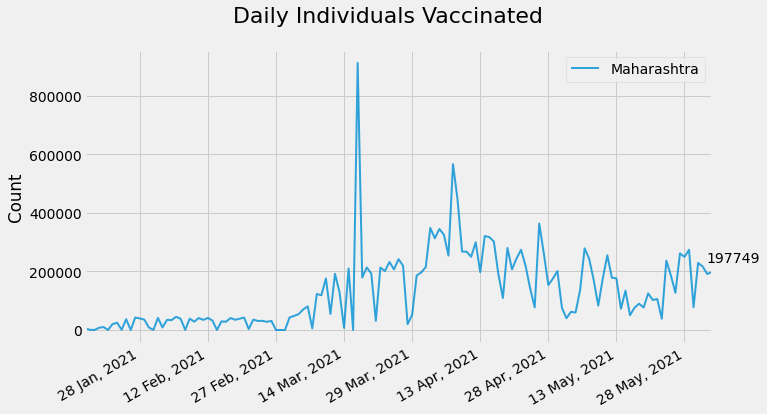

In [71]:
plt.figure(figsize=(10,6))
mah_daily_vac.plot(label='Maharashtra',linewidth=2, alpha=.8)
# up_daily_vac.plot(label='Uttar Pradesh', linewidth=2, alpha=.8)
# raj_daily_vac.plot(label='Rajasthan', linewidth=2, alpha=.8)
# guj_daily_vac.plot(label='Gujarat', linewidth=2, alpha=.7)
# wb_daily_vac.plot(label='West Bengal', linewidth=2, alpha=.7)
# kar_daily_vac.plot(label='Karnataka', linewidth=2, alpha=.6)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.xlabel('')
plt.ylabel('Count')
plt.suptitle('Daily Individuals Vaccinated', fontsize=22)
plt.annotate(text=str(int(curr_mah_vac)), xy=(curr_date, curr_mah_vac),
             xycoords='data', xytext=(-5,10), textcoords='offset points', fontsize=14)

## Summary

In [72]:
states_conf = only_state_wise_df['Confirmed']/10**6
states_active = only_state_wise_df['Confirmed']-only_state_wise_df['Recovered']-only_state_wise_df['Deceased']
states_fat_ratio = only_state_wise_df['Fatality_ratio']*1000

Text(0, 0.5, 'Active')

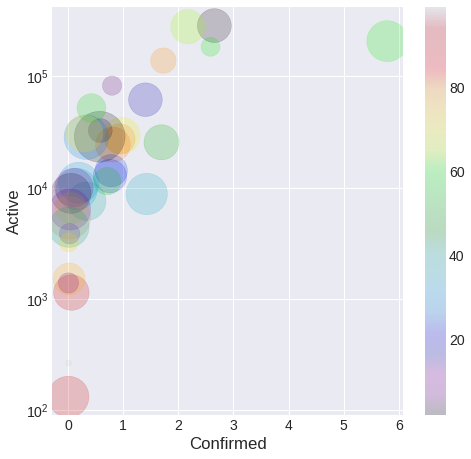

In [73]:
plt.style.use("seaborn-dark")

plt.figure(figsize=(7,7))
colors = np.random.randint(100, size=(len(states_conf)))

plt.scatter(states_conf, states_active, c=colors, alpha=.2, s=states_fat_ratio, cmap='nipy_spectral')
plt.yscale('log')
plt.colorbar()
plt.grid(True)
plt.xlabel('Confirmed')
plt.ylabel('Active')